In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else:

    plt.rc("font", family="Malgun Gothic")


In [3]:
df = pd.read_csv('./basic.csv')
df

,Unnamed: 0,20111231,20121231,20131231,20141231,20151231,20161231,20171231,20181231,20191231,20201231
0,유동비율,321.604623,286.143240,311.899665,415.485748,320.782615,419.062707,388.928534,333.226330,464.212748,479.905718
1,부채비율,28.207079,29.029297,27.681109,23.497585,24.051292,24.547252,29.214289,23.636573,33.206888,29.781075
2,ROE,14.441248,16.269405,14.563743,17.954789,10.513438,14.731229,19.202914,16.501577,14.685940,20.739893
3,ROIC,8.638847,9.265590,9.983536,12.755768,7.403896,10.762070,11.876118,13.567128,10.219815,14.901217
4,영업이익률,22.290566,20.072731,27.123991,33.168245,28.327217,33.425872,33.263873,35.853522,28.156391,34.136210
5,매출액증가율,-7.699800,23.755420,0.416130,10.845429,-0.050148,17.327888,78.812407,-2.479427,-0.812195,42.029445
6,자기자본증가율,14.082674,17.513699,13.541500,18.712316,30.048145,5.957315,43.984600,-12.833902,5.598807,25.178350


In [11]:
df.rename(columns={'종류': 'Date'}, inplace=True)

In [12]:
df

,Date,20111231,20121231,20131231,20141231,20151231,20161231,20171231,20181231,20191231,20201231
0,유동비율,321.604623,286.143240,311.899665,415.485748,320.782615,419.062707,388.928534,333.226330,464.212748,479.905718
1,부채비율,28.207079,29.029297,27.681109,23.497585,24.051292,24.547252,29.214289,23.636573,33.206888,29.781075
2,ROE,14.441248,16.269405,14.563743,17.954789,10.513438,14.731229,19.202914,16.501577,14.685940,20.739893
3,ROIC,8.638847,9.265590,9.983536,12.755768,7.403896,10.762070,11.876118,13.567128,10.219815,14.901217
4,영업이익률,22.290566,20.072731,27.123991,33.168245,28.327217,33.425872,33.263873,35.853522,28.156391,34.136210
5,매출액증가율,-7.699800,23.755420,0.416130,10.845429,-0.050148,17.327888,78.812407,-2.479427,-0.812195,42.029445
6,자기자본증가율,14.082674,17.513699,13.541500,18.712316,30.048145,5.957315,43.984600,-12.833902,5.598807,25.178350


In [14]:
df.set_index('Date', inplace=True)

In [15]:
df = df.T

In [16]:
df

Date,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율
20111231,321.604623,28.207079,14.441248,8.638847,22.290566,-7.699800,14.082674
20121231,286.143240,29.029297,16.269405,9.265590,20.072731,23.755420,17.513699
20131231,311.899665,27.681109,14.563743,9.983536,27.123991,0.416130,13.541500
20141231,415.485748,23.497585,17.954789,12.755768,33.168245,10.845429,18.712316
20151231,320.782615,24.051292,10.513438,7.403896,28.327217,-0.050148,30.048145
20161231,419.062707,24.547252,14.731229,10.762070,33.425872,17.327888,5.957315
20171231,388.928534,29.214289,19.202914,11.876118,33.263873,78.812407,43.984600
20181231,333.226330,23.636573,16.501577,13.567128,35.853522,-2.479427,-12.833902
20191231,464.212748,33.206888,14.685940,10.219815,28.156391,-0.812195,5.598807
20201231,479.905718,29.781075,20.739893,14.901217,34.136210,42.029445,25.178350


In [17]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2020, 12, 31)

nc_soft = web.DataReader("036570.KS", "yahoo", start=start, end=end)


In [26]:
temp = []
for i in range(2011, 2021):
    k = nc_soft[f'{i}']['Close'].mean()
    temp.append(round(k))

C:\Users\BAUM\AppData\Local\Temp\ipykernel_2440\2692396514.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  k = nc_soft[f'{i}']['Close'].mean()


In [27]:
temp 


[289623,
 246950,
 174012,
 177735,
 201044,
 250083,
 373577,
 407834,
 498195,
 766214]

In [28]:
df['year_price'] = temp

In [29]:
df

Date,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율,year_price
20111231,321.604623,28.207079,14.441248,8.638847,22.290566,-7.699800,14.082674,289623
20121231,286.143240,29.029297,16.269405,9.265590,20.072731,23.755420,17.513699,246950
20131231,311.899665,27.681109,14.563743,9.983536,27.123991,0.416130,13.541500,174012
20141231,415.485748,23.497585,17.954789,12.755768,33.168245,10.845429,18.712316,177735
20151231,320.782615,24.051292,10.513438,7.403896,28.327217,-0.050148,30.048145,201044
20161231,419.062707,24.547252,14.731229,10.762070,33.425872,17.327888,5.957315,250083
20171231,388.928534,29.214289,19.202914,11.876118,33.263873,78.812407,43.984600,373577
20181231,333.226330,23.636573,16.501577,13.567128,35.853522,-2.479427,-12.833902,407834
20191231,464.212748,33.206888,14.685940,10.219815,28.156391,-0.812195,5.598807,498195
20201231,479.905718,29.781075,20.739893,14.901217,34.136210,42.029445,25.178350,766214


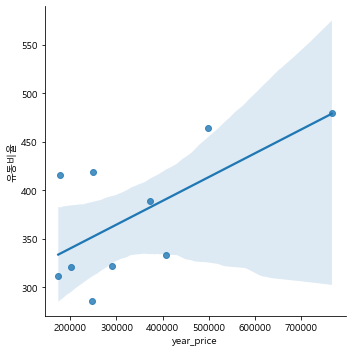

In [33]:
sns.lmplot(x='year_price', y='유동비율', data=df)

In [31]:
df2 = df.corr()
df2

Date,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율,year_price
Date,,,,,,,,
유동비율,1.000000,0.321184,0.492273,0.588299,0.583769,0.314209,0.069696,0.660618
부채비율,0.321184,1.000000,0.245696,-0.037249,-0.368389,0.266372,0.205583,0.531136
ROE,0.492273,0.245696,1.000000,0.855871,0.433090,0.686992,0.201488,0.587334
ROIC,0.588299,-0.037249,0.855871,1.000000,0.756224,0.409870,-0.137965,0.629061
영업이익률,0.583769,-0.368389,0.433090,0.756224,1.000000,0.315056,-0.084380,0.360057
매출액증가율,0.314209,0.266372,0.686992,0.409870,0.315056,1.000000,0.690850,0.346440
자기자본증가율,0.069696,0.205583,0.201488,-0.137965,-0.084380,0.690850,1.000000,0.005011
year_price,0.660618,0.531136,0.587334,0.629061,0.360057,0.346440,0.005011,1.000000


C:\Users\BAUM\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:xlabel='Date', ylabel='Date'>

C:\Users\BAUM\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


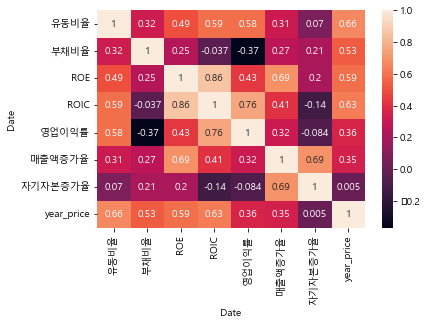

In [32]:
sns.heatmap(df2, annot=True)

In [35]:
df['ROE'].std()

2.882637231729584

In [37]:
df.describe()

Date,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율,year_price
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,374.125193,27.285244,15.960418,10.937398,29.581862,16.214515,16.178350,338526.700000
std,68.429932,3.243432,2.882637,2.329388,5.317741,26.660903,15.363068,184048.037208
min,286.143240,23.497585,10.513438,7.403896,20.072731,-7.699800,-12.833902,174012.000000
25%,320.988117,24.175282,14.594292,9.445077,27.382091,-0.621683,7.853362,212520.500000
50%,361.077432,27.944094,15.500317,10.490942,30.747731,5.630779,15.798186,269853.000000
75%,418.168467,29.168041,17.591486,12.535856,33.385372,22.148537,23.561842,399269.750000
max,479.905718,33.206888,20.739893,14.901217,35.853522,78.812407,43.984600,766214.000000
